In [242]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.size'] = 15 
matplotlib.rcParams['axes.unicode_minus'] = False

In [243]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')

In [244]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: title={'center': '성별 생존자 수'}, xlabel='Sex', ylabel='count'>

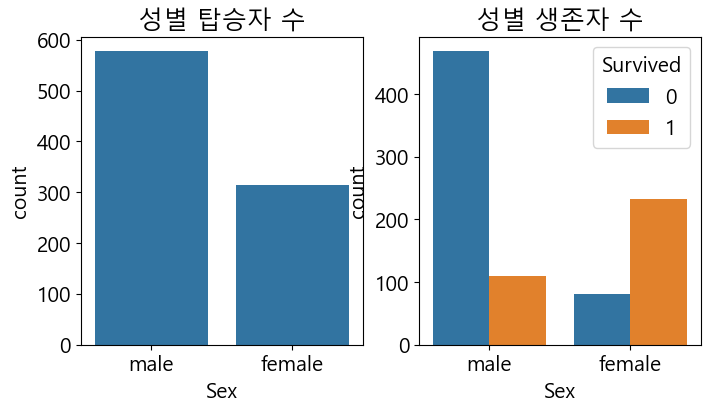

In [245]:
fig, axe = plt.subplots(1,2,figsize=(8,4))
axe[0].set_title('성별 탑승자 수')
sns.countplot(x='Sex',data=train,ax=axe[0])
axe[1].set_title('성별 생존자 수')
sns.countplot(x='Sex',hue='Survived',data=train,ax=axe[1])

        Survived
Sex             
female  0.742038
male    0.188908


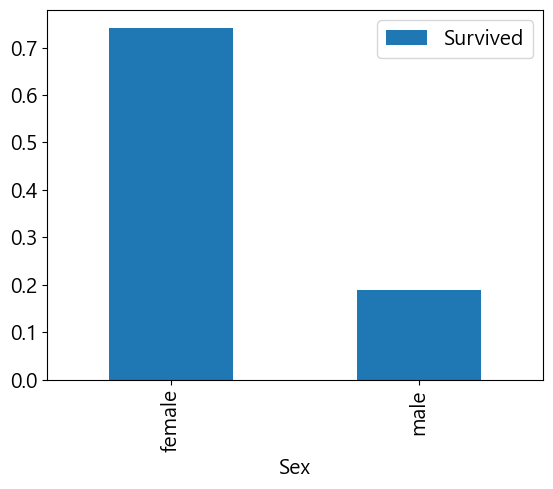

In [246]:
sur = train[['Sex','Survived']].groupby('Sex').mean().plot.bar()
print(train[['Sex','Survived']].groupby('Sex').mean())

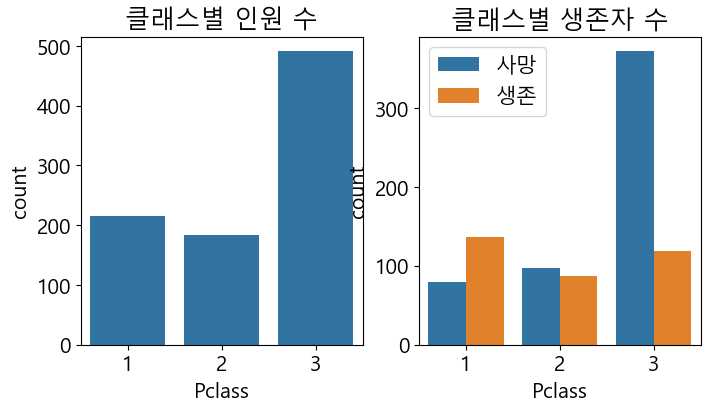

In [247]:
fig1,axe1 = plt.subplots(1,2,figsize=(8,4))
axe1[0].set_title('클래스별 인원 수')
axe1[0] = sns.countplot(x='Pclass',data=train,ax=axe1[0])
axe1[1].set_title('클래스별 생존자 수')
axe1[1] = sns.countplot(x='Pclass',hue='Survived',data=train,ax=axe1[1])
axe1[1].legend(labels=['사망','생존'])


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


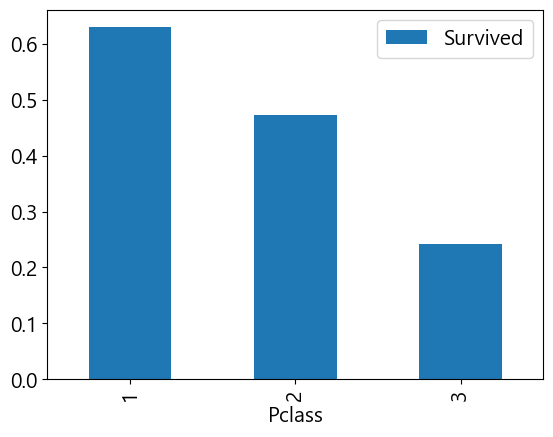

In [248]:
tic = train[['Pclass','Survived']].groupby('Pclass').mean().plot.bar()
train[['Pclass','Survived']].groupby('Pclass').mean()


        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


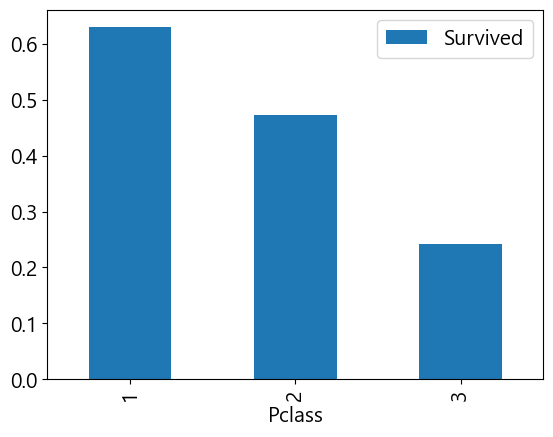

In [249]:
cla = train[['Pclass','Survived']].groupby('Pclass').mean().plot.bar()
print(train[['Pclass','Survived']].groupby('Pclass').mean())

In [250]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

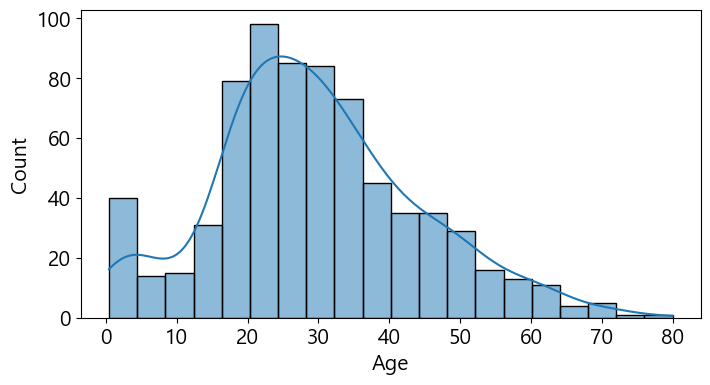

In [251]:
plt.figure(figsize=(8,4))
sns.histplot(train['Age'],bins=20,kde=True)

C:\Users\kjb00\AppData\Local\Temp\ipykernel_9632\1443607478.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sur['Age'],bins=25,hist=False)
C:\Users\kjb00\AppData\Local\Temp\ipykernel_9632\1443607478.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dead['Age'],bins=25,his

<Axes: xlabel='Age', ylabel='Density'>

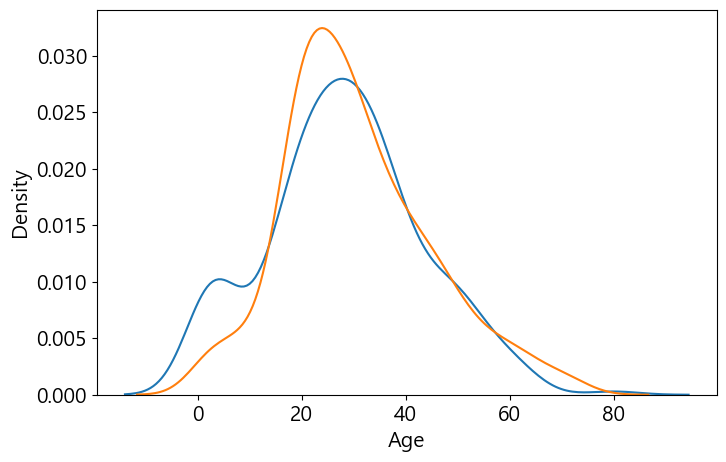

In [252]:
sur = train[train['Survived']==1]
dead = train[train['Survived']==0]

plt.figure(figsize=(8,5))
sns.distplot(sur['Age'],bins=25,hist=False)
sns.distplot(dead['Age'],bins=25,hist=False)


In [253]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [254]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [255]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [256]:
combine = [train,test]

In [257]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [258]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [259]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [260]:
sur = train[['Pclass','Survived']].groupby('Pclass').mean()
sur
# 객실의 등급이 높을수록 생존율이 높다

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: title={'center': 'Survived = 0'}, xlabel='Age', ylabel='Count'>

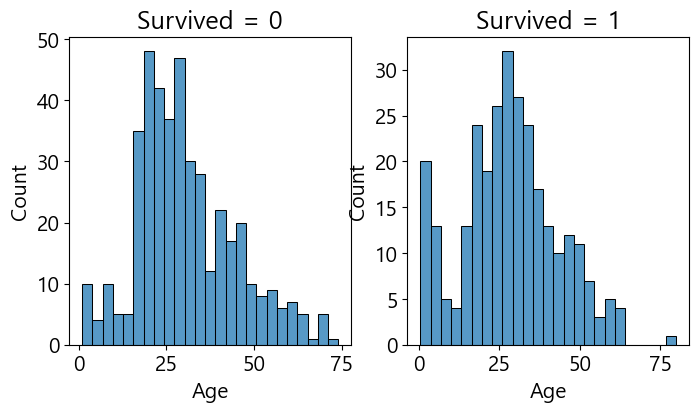

In [261]:
fig,ax = plt.subplots(1,2,figsize=(8,4))

sur = train[train['Survived']==1]
dead = train[train['Survived']==0]
ax[1].set_title('Survived = 1')
sns.histplot(sur['Age'],bins=25,ax=ax[1])
ax[0].set_title('Survived = 0')
sns.histplot(dead['Age'],bins=25,ax=ax[0])


In [262]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [263]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [264]:
train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [265]:
train[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [266]:
train[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [267]:
train = train.drop(['Ticket','Cabin'],axis=1)
test = test.drop(['Ticket','Cabin'],axis=1)

In [268]:
combine = [train,test]

In [269]:
train['Embarked'].isnull().sum()

2

In [270]:
train['Sex'] = train['Sex'].map({'female':0,'male':1})

In [271]:
train['Embarked'].fillna('S',inplace=True)

In [272]:
train['Embarked'] = train['Embarked'].map({'C':0,'Q':1,'S':2})

In [273]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [274]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [275]:
from sklearn.ensemble import RandomForestClassifier

y = train['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [276]:
X = train[['PassengerId','Pclass','Sex','SibSp','Parch']]

In [277]:
from sklearn.model_selection import train_test_split

X.shape

(891, 5)

In [278]:
y.shape

(891,)

In [279]:
test
test['Sex'] = test['Sex'].map({'female':0,'male':1})
test['Embarked']=test['Embarked'].map({'C':0,'Q':1,'S':2})

In [280]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,8.0500,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,2
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,8.0500,2


In [281]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [282]:
test_X = test[['Pclass','Sex','SibSp','Parch']]

In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X,y)

C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [284]:
model.score(X,y)

0.7912457912457912

In [285]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [292]:
X_test = test[['PassengerId','Pclass','Sex','SibSp','Parch']]

In [294]:
X.columns

Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch'], dtype='object')

In [293]:
X_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch'], dtype='object')

In [295]:
predicted = model.predict(X_test)

In [299]:
model.score(X,y)

0.7912457912457912

In [303]:
svc = SVC()
svc.fit(X,y)
print(svc.score(X,y))

0.6161616161616161


In [304]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)
knn.score(X,y)

0.8024691358024691

In [306]:
NB = GaussianNB()
NB.fit(X,y)
NB.score(X,y)

0.7699214365881033

In [309]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X,y)
decision_tree.score(X,y)

1.0

In [312]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X,y)
print(round(random_forest.score(X,y)*100,2))

99.78


In [315]:
data

array([[1, 3, 'Braund, Mr. Owen Harris', ..., 0, 7.25, 2],
       [2, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', ...,
        0, 71.2833, 0],
       [3, 3, 'Heikkinen, Miss. Laina', ..., 0, 7.925, 2],
       ...,
       [889, 3, 'Johnston, Miss. Catherine Helen "Carrie"', ..., 2,
        23.45, 2],
       [890, 1, 'Behr, Mr. Karl Howell', ..., 0, 30.0, 0],
       [891, 3, 'Dooley, Mr. Patrick', ..., 0, 7.75, 1]], dtype=object)

In [327]:
data = train.drop(['Survived','Name'],axis=1).values
target = train['Survived'].values
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.4,stratify=target,random_state=0)

def ml_fit(model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(prediction, y_test)
    print(model)
    print(f'총 {y_test.shape[0]}명 중 {accuracy * 100:.3f}% 정확도로 생존을 맞춤')
    return model

In [326]:

age_mean = train['Age'].mean()
age_mean
train['Age'].fillna(age_mean,inplace=True)

In [328]:
model = ml_fit(RandomForestClassifier(n_estimators=100))
model = ml_fit(LogisticRegression(solver='lbfgs'))
model = ml_fit(SVC(gamma='scale'))
model = ml_fit(KNeighborsClassifier())
model = ml_fit(GaussianNB())
model = ml_fit(DecisionTreeClassifier())

RandomForestClassifier()
총 357명 중 81.232% 정확도로 생존을 맞춤
LogisticRegression()
총 357명 중 77.591% 정확도로 생존을 맞춤
SVC()
총 357명 중 64.986% 정확도로 생존을 맞춤
KNeighborsClassifier()
총 357명 중 63.025% 정확도로 생존을 맞춤
GaussianNB()
총 357명 중 78.151% 정확도로 생존을 맞춤
DecisionTreeClassifier()
총 357명 중 71.429% 정확도로 생존을 맞춤


C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [337]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
predicted = rf.predict(X_test)
len(predicted)

357

In [335]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = predicted
submission.to_csv('titanic2024.csv',index=False)

ValueError: Length of values (357) does not match length of index (418)